In [1]:
import pandas as pd

from visualization import view_curve
from stats import Distance, SuffixAverage, avg_dist_to_suffix_avg

### Quantifying differences between plots

In [2]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')

### Comparison of individual words with average suffix

Euclidean distance between "sensation" and average of all words with suffix "ion" : 0.04

Run 1 of 1:


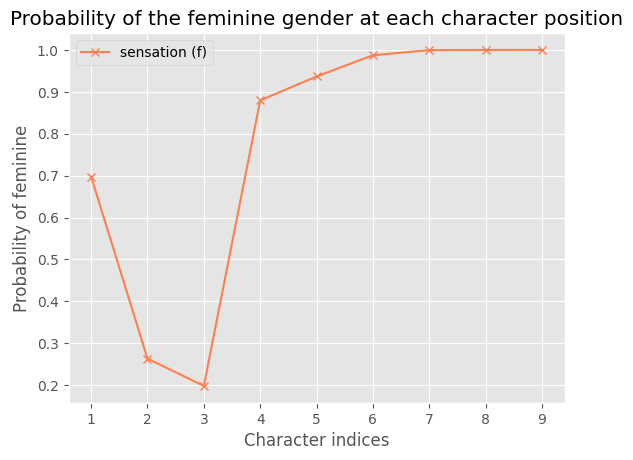

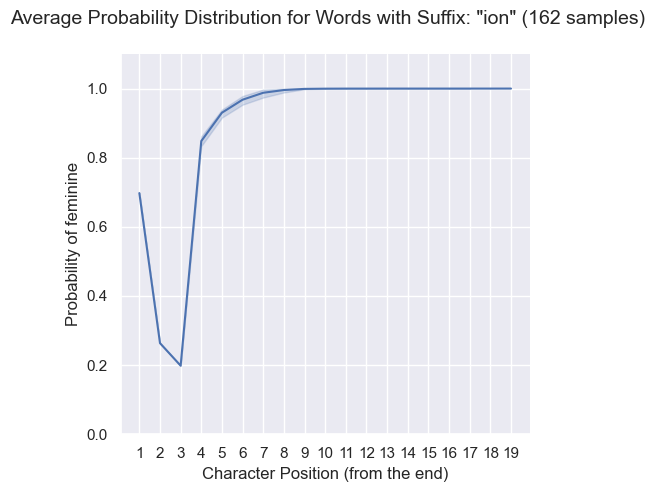

In [3]:
# Example 
word = 'sensation'
suffix = 'ion'
gender = 'f'

distance = Distance(orth_preds)
sfx_avg = SuffixAverage(orth_preds, suffix)
sfx_avg_probs = sfx_avg.prob(gender=gender)

print(f'Euclidean distance between "{word}" and average of all words with suffix "{suffix}" : {distance.euclidean(word, sfx_avg_probs):.2f}\n')

view_curve([word], orth_preds, binary=True, gender=gender)
sfx_avg.plot(gender=gender, scale=[0, 1.1])

In [4]:
suffixes = orth_preds.suffix.value_counts().to_dict()

# The selected gender has an impact on the average distances
# With gender set to 'f', the feminine suffixes have artificially lower average distances than masculine ones and vice versa 

df = pd.DataFrame({
    'suffix': suffixes.keys(),
    'avg_dist_to_suffix_avg': [avg_dist_to_suffix_avg(orth_preds, sfx, 'True', 2) for sfx in suffixes.keys()],
    'num_samples': suffixes.values()
})

df

,suffix,avg_dist_to_suffix_avg,num_samples
0,0,0.69,2654
1,eurM,0.10,193
2,ment,0.00,184
3,ion,0.08,162
4,age,0.03,99
...,...,...,...
108,i,0.00,1
109,ère,0.00,1
110,enne,0.00,1
111,ange,0.00,1


I'm adding to this dataframe:
- The number of training items that end in the string corresponding to the suffix
- The entropy of gender balance in that set of training items (0=only one gender, 1 = perfectly balanced distribution)

In [7]:
import numpy as np

train=pd.read_csv('../data/orth_train.csv')

def sfx_to_ending(s):
    if s[-1]=='M' or s[-1]=='F':
        return s[:-1]
    return s

for i in df.index:
    ending = sfx_to_ending(df.loc[i,'suffix'])
    subset = train[train.lexeme.str.endswith(ending)]
    vc = subset.gen.value_counts(normalize=True)
    df.loc[i,'train_size'] = len(subset)
    df.loc[i,'entropy'] = abs(- np.sum(vc*np.log2(vc)))

df

,suffix,avg_dist_to_suffix_avg,num_samples,train_size,entropy
0,0,0.69,2654,0.0,0.000000
1,eurM,0.10,193,1327.0,0.294820
2,ment,0.00,184,820.0,0.013563
3,ion,0.08,162,1597.0,0.219192
4,age,0.03,99,779.0,0.082575
...,...,...,...,...,...
108,i,0.00,1,335.0,0.349559
109,ère,0.00,1,404.0,0.707848
110,enne,0.00,1,167.0,0.052827
111,ange,0.00,1,14.0,1.000000


We now have expectations that:

- All other things being equal, there should be more varation in average distance when the training set is smaller.
- All other things being equal, the entropy of the gender balance in the training set should correlate with the average distance.

The following figure suggests that this is broadly correct.

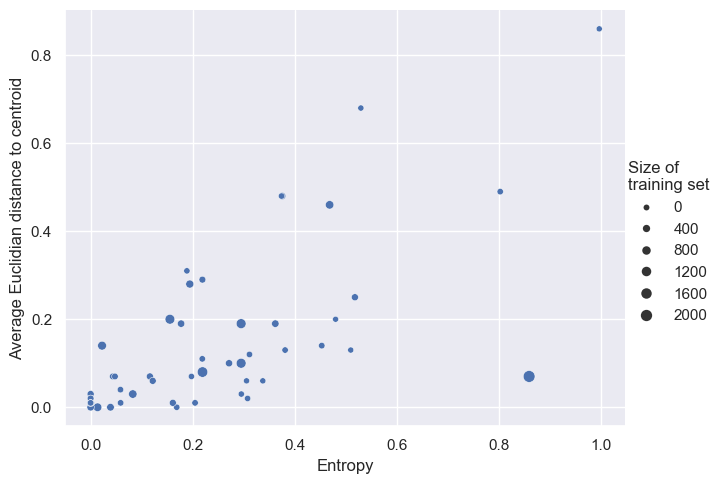

In [31]:
import seaborn as sns

g = sns.relplot(df[(df.num_samples>5) & (df.suffix!='0')],
            x='entropy',
            y='avg_dist_to_suffix_avg',
            size = 'train_size',
            # hue='train_size',
            aspect=1.3)
g.set(xlabel='Entropy',ylabel='Average Euclidian distance to centroid')
g.legend.set_title('Size of\ntraining set')

### Comparing the averages of different suffixes

Euclidean distance between average of all words with suffix "eurM" & average of all word with suffix "eurF": 0.11


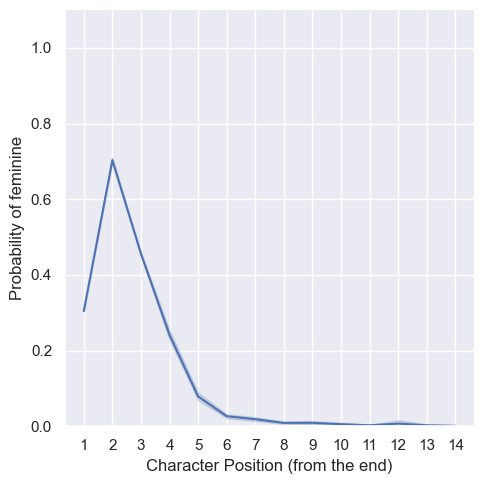

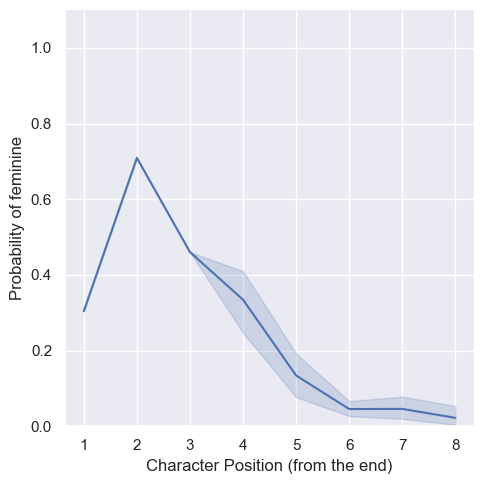

In [6]:
sfx_a = 'eurM'
sfx_b = 'eurF'

sfx_a_avg = SuffixAverage(orth_preds, sfx_a)
sfx_a_avg_probs = sfx_a_avg.prob(gender='f')

sfx_b_avg = SuffixAverage(orth_preds, sfx_b)
sfx_b_avg_probs = sfx_b_avg.prob(gender='f')

print(f'Euclidean distance between average of all words with suffix "{sfx_a}" & average of all word with suffix "{sfx_b}": {distance.euclidean(sfx_a_avg_probs, sfx_b_avg_probs):.2f}')

sfx_a_avg.plot(gender='f', min_dp=3, scale=[0, 1.1], title=False)   # 'eurM' (193 samples)
sfx_b_avg.plot(gender='f', min_dp=3, scale=[0, 1.1], title=False)   # 'eurF' (15 samples)

Euclidean distance between average of all words with suffix "on" & average of all word with suffix "ion": 3.18


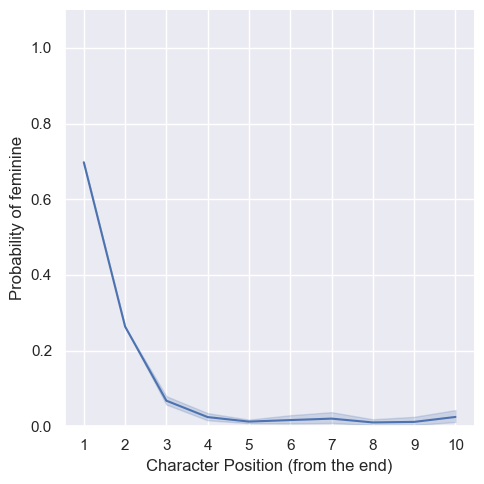

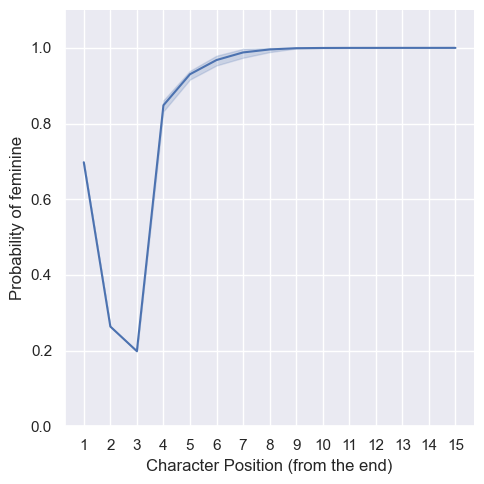

In [8]:
sfx_a = 'on'
sfx_b = 'ion'

sfx_a_avg = SuffixAverage(orth_preds, sfx_a)
sfx_a_avg_probs = sfx_a_avg.prob(gender='f')

sfx_b_avg = SuffixAverage(orth_preds, sfx_b)
sfx_b_avg_probs = sfx_b_avg.prob(gender='f')

print(f'Euclidean distance between average of all words with suffix "{sfx_a}" & average of all word with suffix "{sfx_b}": {distance.euclidean(sfx_a_avg_probs, sfx_b_avg_probs):.2f}')

sfx_a_avg.plot(gender='f', min_dp=3, scale=[0, 1.1], title=False)   # "on" (72 samples)
sfx_b_avg.plot(gender='f', min_dp=3, scale=[0, 1.1], title=False)   # "ion" (162 samples)